In [7]:
import numpy as np
import tensorflow.compat.v1 as tf
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import keras
import pandas as pd

In [2]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

# 训练与测试集形状
print(xtrain.shape)
print(xtest.shape)

# 归一化处理
xtrain = xtrain/255
xtest = xtest/255

(60000, 28, 28)
(10000, 28, 28)


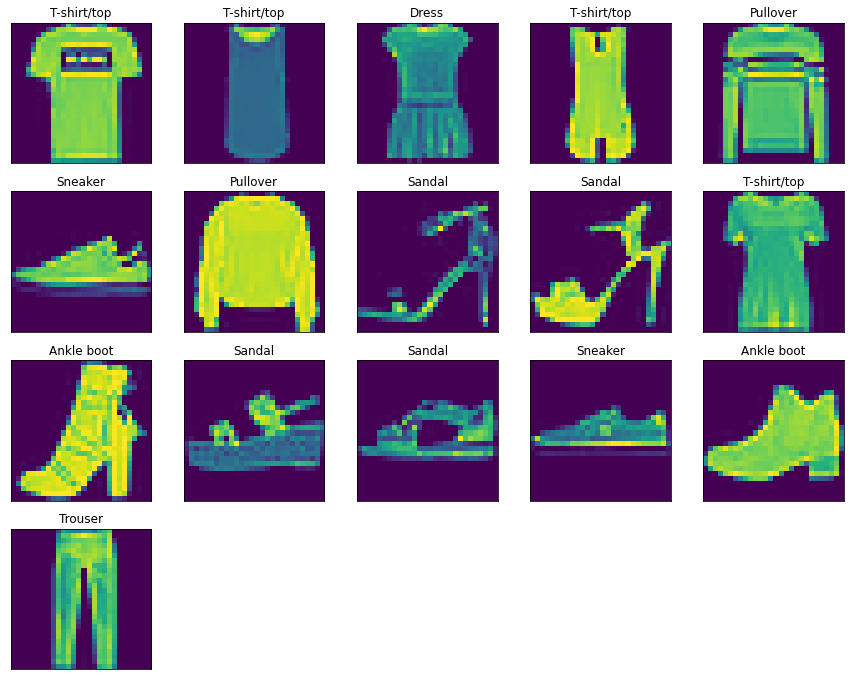

In [3]:
# 显示图片

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(5,5,i+1)
    plt.imshow(xtrain[i+1])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[ytrain[i+1]])

In [10]:
# 创建模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['acc'])
model.fit(xtrain,ytrain,epochs=100,batch_size=1000,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.8511 - acc: 0.7240 - val_loss: 0.5770 - val_acc: 0.8028
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.5077 - acc: 0.8302 - val_loss: 0.5010 - val_acc: 0.8299
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.4623 - acc: 0.8416 - val_loss: 0.4751 - val_acc: 0.8326
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4285 - acc: 0.8529 - val_loss: 0.4674 - val_acc: 0.8342
Epoch 5/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4076 - acc: 0.8597 - val_loss: 0.4339 - val_acc: 0.8476
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3931 - acc: 0.8638 - val_loss: 0.4206 - val_acc: 0.8539
Epoch 7/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.3799 - acc: 0.8676 - val_loss: 0.4120 - 

In [11]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 0s 26us/step


[0.3571144913852215, 0.8898000121116638]

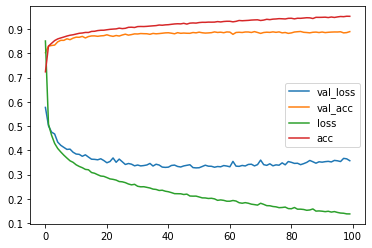

In [12]:
pd.DataFrame(model.history.history).plot()

Ankle boot


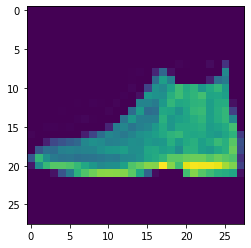

In [16]:
predict = model.predict(xtest)
plt.imshow(xtest[0])
print(class_names[np.argmax(predict[0])])

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

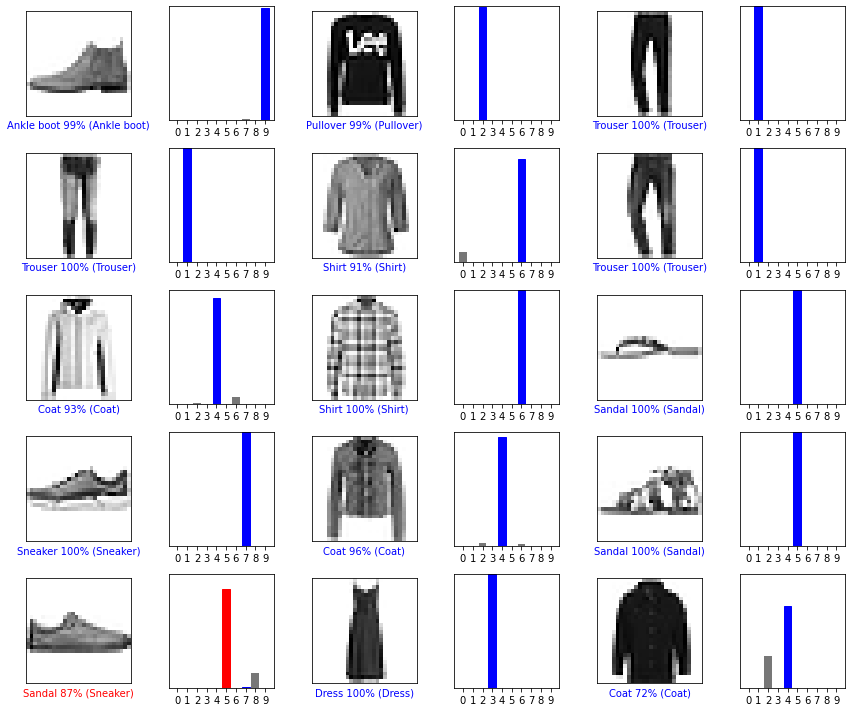

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predict[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predict[i], ytest)
plt.tight_layout()
plt.show()